In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFE## Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
import seaborn as sns

In [180]:
df = pd.read_csv(r'C:\Users\prasa\OneDrive\Desktop\Regression\Data\Melbourne_housing_FULL.csv')
print(df.shape)

(34857, 21)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [182]:
df = df.sample(frac = 1) ##this is to suffle the dataset!!

In [183]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7575,Oakleigh South,22 Pitt St,3,h,1068000.0,S,Ray,27/11/2016,14.7,3167.0,...,2.0,2.0,609.0,172.0,1970.0,Kingston City Council,-37.92130,145.0854,South-Eastern Metropolitan,3692.0
29866,Sandringham,29 Victoria St,4,h,NaN,S,hockingstuart,6/01/2018,15.2,3191.0,...,2.0,3.0,NaN,NaN,NaN,Bayside City Council,-37.95635,145.0143,Southern Metropolitan,4497.0
24425,Glen Iris,18/1737 Malvern Rd,3,u,800000.0,VB,Marshall,14/10/2017,7.3,3146.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,10412.0
678,Ashburton,15 Lancaster St,4,h,1280000.0,S,Fletchers,30/07/2016,11.0,3147.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,3052.0
27325,South Yarra,7/49 Adams St,1,u,539000.0,S,Williams,11/11/2017,2.7,3141.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,14887.0


In [184]:
 df.Price.describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

We cant use the rows in depend. variable that has NaN values. Just drop it

In [185]:
df = df[df['Price']>0]
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7575,Oakleigh South,22 Pitt St,3,h,1068000.0,S,Ray,27/11/2016,14.7,3167.0,...,2.0,2.0,609.0,172.0,1970.0,Kingston City Council,-37.9213,145.0854,South-Eastern Metropolitan,3692.0
24425,Glen Iris,18/1737 Malvern Rd,3,u,800000.0,VB,Marshall,14/10/2017,7.3,3146.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,10412.0
678,Ashburton,15 Lancaster St,4,h,1280000.0,S,Fletchers,30/07/2016,11.0,3147.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,3052.0
27325,South Yarra,7/49 Adams St,1,u,539000.0,S,Williams,11/11/2017,2.7,3141.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,14887.0
28075,Port Melbourne,213/99 Nott St,1,u,400000.0,PI,Dingle,18/11/2017,3.5,3207.0,...,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,8648.0


In [186]:
ms = df.isnull().sum()
ms[ms>0]

Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

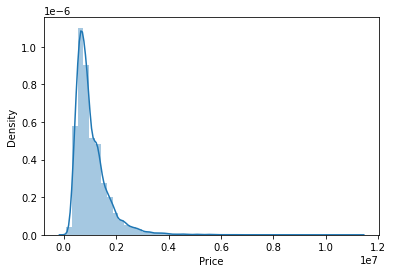

In [187]:
sns.distplot(df.Price)

In [188]:
df['Price'].skew() #Extremely right skewed

2.58896934105286

In [189]:
#Here the analysis includes the houses of mid level & premium type and so comes the outliers. The max value is very much deviated 
# from Q3, so it essential to remove the outliers..

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

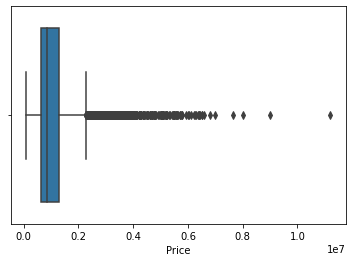

In [190]:
sns.boxplot(df.Price)

We are removing outliers using IQR approach!!

In [191]:
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
IQR = q3 - q1
low  = q1-1.5*IQR
high = q3+1.5*IQR

df = df[(df['Price']<high)]

In [192]:
high

2285000.0

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

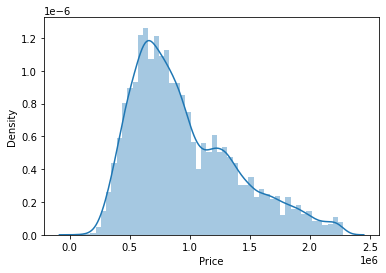

In [193]:
sns.distplot(df.Price)

In [194]:
df['Price'].skew()

0.8588212983646799

In [195]:
ms = df.isnull().sum()
ms[ms>0]/len(df)

Distance         0.000039
Postcode         0.000039
Bedroom2         0.240612
Bathroom         0.240766
Car              0.254863
Landsize         0.344221
BuildingArea     0.613026
YearBuilt        0.560605
CouncilArea      0.000116
Lattitude        0.233679
Longtitude       0.233679
Regionname       0.000116
Propertycount    0.000116
dtype: float64

In the above info.. in the features of Building area & YearBuilt have more than 50% NaN values. So we can drop those variables.

In [196]:
df = df.drop(['YearBuilt','BuildingArea'],axis = 1)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7575,Oakleigh South,22 Pitt St,3,h,1068000.0,S,Ray,27/11/2016,14.7,3167.0,3.0,2.0,2.0,609.0,Kingston City Council,-37.92130,145.08540,South-Eastern Metropolitan,3692.0
24425,Glen Iris,18/1737 Malvern Rd,3,u,800000.0,VB,Marshall,14/10/2017,7.3,3146.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,10412.0
678,Ashburton,15 Lancaster St,4,h,1280000.0,S,Fletchers,30/07/2016,11.0,3147.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,3052.0
27325,South Yarra,7/49 Adams St,1,u,539000.0,S,Williams,11/11/2017,2.7,3141.0,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,14887.0
28075,Port Melbourne,213/99 Nott St,1,u,400000.0,PI,Dingle,18/11/2017,3.5,3207.0,NaN,NaN,NaN,NaN,Melbourne City Council,NaN,NaN,Southern Metropolitan,8648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,Strathmore,7 Colclough Ct,5,h,960000.0,VB,Nelson,27/06/2016,9.7,3041.0,5.0,3.0,2.0,387.0,Moonee Valley City Council,-37.72250,144.90550,Western Metropolitan,3284.0
19522,Kensington,509/72 Altona St,2,u,501000.0,SP,Jellis,29/07/2017,3.4,3031.0,2.0,1.0,1.0,3957.0,Melbourne City Council,-37.79741,144.92614,Northern Metropolitan,5263.0
21705,Blackburn,2A Kerr St,3,t,881000.0,S,Jellis,19/08/2017,13.4,3130.0,3.0,1.0,1.0,300.0,Whitehorse City Council,-37.81156,145.14057,Eastern Metropolitan,5713.0
23280,Malvern East,1B The Grange,2,h,1365000.0,S,Jellis,26/08/2017,8.4,3145.0,2.0,1.0,2.0,NaN,Stonnington City Council,-37.87394,145.05343,Southern Metropolitan,8801.0


In [197]:
ms = df.isnull().sum()
ms[ms>0]/len(df)

Distance         0.000039
Postcode         0.000039
Bedroom2         0.240612
Bathroom         0.240766
Car              0.254863
Landsize         0.344221
CouncilArea      0.000116
Lattitude        0.233679
Longtitude       0.233679
Regionname       0.000116
Propertycount    0.000116
dtype: float64

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

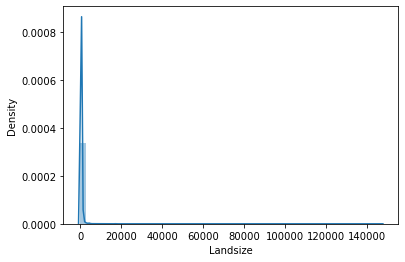

In [198]:
sns.distplot(df['Landsize'].dropna())

In [199]:
df['Landsize'].describe()

count     17026.000000
mean        559.919182
std        1977.411412
min           0.000000
25%         209.000000
50%         492.000000
75%         654.000000
max      146699.000000
Name: Landsize, dtype: float64

Removing Outliers of Landsize as it has very big Max value!!

In [200]:
df['Landsize'].skew()

41.01106473788501

In [201]:
q1 = df.Landsize.quantile(0.25)
q3 = df.Landsize.quantile(0.75)
IQR = q3 - q1
low  = q1-1.5*IQR
high = q3+1.5*IQR

df = df[~(df['Landsize']>high)]

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

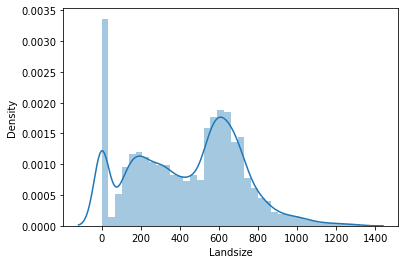

In [202]:
sns.distplot(df['Landsize'])

In [203]:
df['Landsize'].describe()

count    16621.000000
mean       438.288851
std        275.453882
min          0.000000
25%        205.000000
50%        475.000000
75%        649.000000
max       1321.000000
Name: Landsize, dtype: float64

In [204]:
#df['Landsize'].fillna(df.Landsize.median(),inplace = True)

#filling with median made big change to that distribution of  the variable. Hence we will adopt a distribution based imputation.
#(F fill or B fill)

In [205]:
df['Landsize'] = df['Landsize'].fillna(method = 'ffill')

<ipython-input-205-78b5279e60df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'] = df['Landsize'].fillna(method = 'ffill')


C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Landsize', ylabel='Density'>

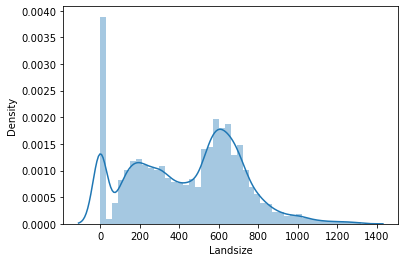

In [206]:
sns.distplot(df['Landsize'])

In [207]:
df.Landsize.describe()

count    25558.000000
mean       437.785116
std        276.246251
min          0.000000
25%        204.000000
50%        473.000000
75%        649.000000
max       1321.000000
Name: Landsize, dtype: float64

In [208]:
num_cols = list(df.select_dtypes(exclude = ['object']).columns) ## extract only numeric cols

In [209]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [210]:
df[num_cols] = df[num_cols].fillna(method='ffill')

C:\Users\prasa\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [211]:
cat_cols = list(df.select_dtypes(include = ['object']).columns)## extract only categorical cols

In [212]:
df['Suburb'].mode()

0    Reservoir
dtype: object

In [213]:
#df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode)
df[cat_cols] = df[cat_cols].fillna('NA')

In [214]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [215]:
df.Type.value_counts()

h    17103
u     5639
t     2816
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type'>

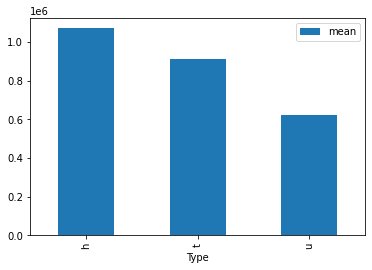

In [216]:
df.groupby('Type')['Price'].agg(['mean']).plot.bar()

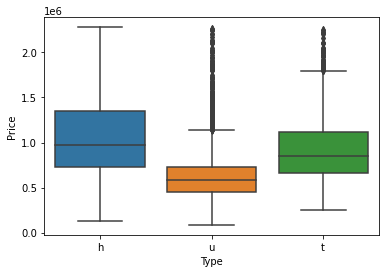

In [217]:
sns.boxplot(x = df.Type,y=df.Price)
plt.show()

In [218]:
q1 = df['Price'].quantile(0.25)
q2 = df['Price'].quantile(0.50)
q3 = df['Price'].quantile(0.75)

def Price_cat(pr):
    if (pr<q1):
        return 1
    elif q1 <= pr < q2:
        return 2
    elif q2 <= pr < q3:
        return 3
    else:
        return 4
    
df['Price_cat'] = df['Price'].apply(Price_cat)
        

<ipython-input-218-7d2140b9069e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_cat'] = df['Price'].apply(Price_cat)


In [219]:
df.groupby('Price_cat')['Price'].agg(['min','max'])

,min,max
Price_cat,,
1,85000.0,628200.0
2,629000.0,849500.0
3,850000.0,1218500.0
4,1220000.0,2280000.0


<AxesSubplot:xlabel='Price_cat'>

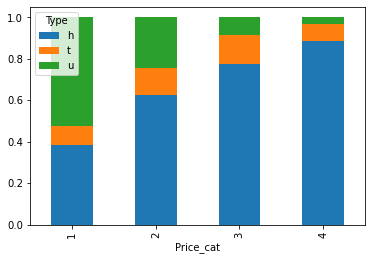

In [220]:
ct = pd.crosstab(df['Price_cat'],df['Type'],normalize = 0)#calculating proportion
ct.plot.bar(stacked = True)

### Linear Regression Model

In [221]:
for col in cat_cols:
    print(col, df[col].nunique())

Suburb 339
Address 25120
Type 3
Method 5
SellerG 346
Date 78
CouncilArea 34
Regionname 9


In the categorical column, suburb, date, seller have so many categories. So we can drop those

In [222]:
df = df.drop(['Date','Suburb','SellerG','Address'],axis = 1)

In [223]:
cat_cols = list(df.select_dtypes(include = ['object']).columns)## extract only categorical cols

In [224]:
cat_cols

['Type', 'Method', 'CouncilArea', 'Regionname']

In [225]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True) #drop_first is for dropping the first alphabet values in columns

In [226]:
df = df.drop(['Price_cat','Postcode'], axis = 1)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25558 entries, 7575 to 26812
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Rooms                                       25558 non-null  int64  
 1   Price                                       25558 non-null  float64
 2   Distance                                    25558 non-null  float64
 3   Bedroom2                                    25558 non-null  float64
 4   Bathroom                                    25558 non-null  float64
 5   Car                                         25558 non-null  float64
 6   Landsize                                    25558 non-null  float64
 7   Lattitude                                   25558 non-null  float64
 8   Longtitude                                  25558 non-null  float64
 9   Propertycount                               25558 non-null  float64
 10  Type_t 

In [232]:
y = df.Price
X = df.drop('Price',axis = 1)

### First build model based on statistics

In [233]:
Xc = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.3, random_state=42)

In [234]:
lin_reg = sm.OLS(y_train, X_train)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     654.0
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:06:46   Log-Likelihood:            -2.4772e+05
No. Observations:               17890   AIC:                         4.956e+05
Df Residuals:                   17834   BIC:                         4.960e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Here we can see the significance from overall value

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


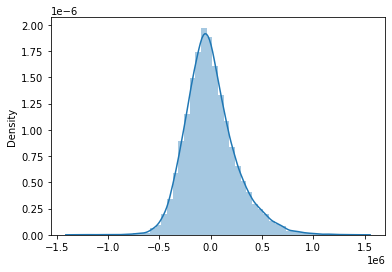

In [235]:
sns.distplot(result.resid)
plt.show()

residuals are well distributed

#### Multicollinearity

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'VIF':vif}, index = X_train.columns)

C:\Users\prasa\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
const,3.495296e+06
Rooms,2.898517e+00
Distance,7.293483e+00
Bedroom2,3.033049e+00
Bathroom,1.628433e+00
Car,1.255085e+00
Landsize,1.431170e+00
Lattitude,2.604415e+00
Longtitude,2.763425e+00
Propertycount,1.557321e+00


#### We'll use backward elimination technique to remove based on the p-value

In [237]:
cols = X_train.columns.tolist()
pmax = 1

while (len(cols)>0):
    X_1=X_train[cols]
    model=sm.OLS(y_train,X_1).fit()
    p=pd.Series(model.pvalues.values, index=cols)
    pmax=max(p)
    feature_max_p=p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_max_p)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Type_t', 'Type_u', 'Method_S', 'Method_SP', 'CouncilArea_Bayside City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Brimbank City Council', 'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council', 'CouncilArea_Darebin City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Glen Eira City Council', 'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Kingston City Council', 'CouncilArea_Macedon Ranges Shire Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Maribyrnong City Council', 'CouncilArea_Maroondah City Council', 'CouncilArea_Melbourne City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Mitchell Shire Council', 'CouncilArea_Monash City Council', 'CouncilArea_Moonee Valley City Council', 'CouncilArea_Moreland City Council', 'CouncilArea_Port Phillip City Council', 'CouncilArea_Stonnington

In [238]:
len(selected_features_BE)

42

In [239]:
lin_reg = sm.OLS(y_train, X_train[selected_features_BE])
result = lin_reg.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              7055.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:19:46   Log-Likelihood:                     -2.4773e+05
No. Observations:               17890   AIC:                                  4.955e+05
Df Residuals:                   17848   BIC:                                  4.959e+05
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------

In [240]:
from sklearn.metrics import r2_score,mean_squared_error

y_pred = result.predict(X_test[selected_features_BE])
print('R2 on the test set:',r2_score(y_test,y_pred))

R2 on the test set: 0.6664338068893567


## Over to Machine Learning (Regression)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [242]:
lr = LinearRegression(fit_intercept=True) #fit_intercept is for adding constant
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
print('R2 of Train: ',r2_score(y_train, y_pred_train))
print('RMSE of train:',np.sqrt(mean_squared_error(y_train,y_pred_train))) 

R2 of Train:  0.6685540091125213
RMSE of train: 249671.08897189284


RMSE is based on the units. We cant say it's big or small at very first time. If RMSE is lowered from previous value then it can be said that model is improved. Here RMSE is based on "Price".

In [243]:
y_pred_test = lr.predict(X_test)
print('R2 of Test: ',r2_score(y_test, y_pred_test))
print('RMSE of Test:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 of Test:  0.6668466071664249
RMSE of Test: 249129.27247110035


There is no overfitting as values of train & test are similar.

In [253]:
pd.DataFrame(lr.coef_,X_train.columns, columns = ['coefs'])

,coefs
Rooms,187507.908774
Distance,-28714.902531
Bedroom2,-38610.374366
Bathroom,56962.040343
Car,10230.104106
Landsize,111.941665
Lattitude,-204931.943362
Longtitude,-32190.785865
Propertycount,-0.926760
Type_t,-197771.959800


### RFE

In [254]:
X_train.shape

(17890, 56)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_featur

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=29 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=31 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_fea

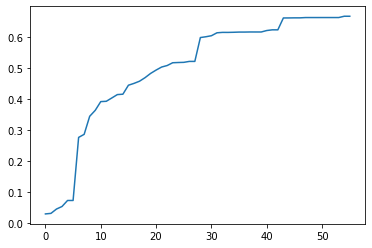

In [255]:
noof_cols = 56
score_list=[]
nof=0  
high_score=0
for n in range(noof_cols):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model=LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    
plt.plot(score_list)
    #if(score>high_score):
        #high_score = score
        #nof = noof_cols[n]
#print("Optimum number of features: %d" %nof)
#print("Score with %d features: %f" % (nof, high_score))